# GraphPlot
## A graph visualization package in Julia
### Han Jihui
### jh@mails.ccnu.edu.cn
### @afternone
### github.com/afternone

# Get Started


# Undirected Graph


In [78]:
# load needed package firstly
import Pkg; Pkg.add("GraphPlot")
Pkg.add("SimpleWeightedGraphs")
using LightGraphs
using GraphPlot
using SimpleWeightedGraphs


using Pkg
Pkg.add("DataFrames")
Pkg.add("XLSX")
Pkg.add("Missings")

using DataFrames, XLSX
using Missings

Pkg.add("JLD")
using JLD

import Pkg; Pkg.add("MetaGraphs")
import Pkg; Pkg.add("GraphRecipes")



using MetaGraphs
using LightGraphs
using GraphRecipes
using Plots

In [81]:
Pkg.add("GraphLayout")
using GraphLayout
am = Matrix(adjacency_matrix(g))
loc_x, loc_y = layout_spring_adj(am)
draw_layout_adj(am, loc_x, loc_y, filename="wheel10.svg")

In [90]:
using SimpleWeightedGraphs
m = opt["Asol"]
source = repeat(1:N,1,N)
g = SimpleGraph([source...],[transpose(source)...], [m...]; combine = +)
gplot(g)

MethodError: MethodError: no method matching SimpleGraph(::Array{Int64,1}, ::Array{Int64,1}, ::Array{Float64,1}; combine=+)
Closest candidates are:
  SimpleGraph(::Any, !Matched::Array{Array{T,1},1}) where T at /home/ec2-user/.julia/packages/LightGraphs/siFgP/src/SimpleGraphs/simplegraph.jl:23 got unsupported keyword argument "combine"

In [58]:
opt = load("/home/ec2-user/SageMaker/Test-AWS/net_opt.jld")

In [64]:
xf = XLSX.readxlsx("node_stats_for_simulation.xlsx") #xf["BHCs"]["A1:I1"]
data = vcat( [(XLSX.eachtablerow(xf[s]) |> DataFrames.DataFrame) for s in XLSX.sheetnames(xf)]... )
unique!(data) # delete duplicate rows
#sort!(data, :assets, rev = true)
data = data[1:30,:] # keep small number of nodes, for testing
data = data[data.w .> 0, :]
N = size(data,1) # number of nodes

# rescale units
units = 1e6;
data[:,[:w, :c, :assets, :p_bar, :b]] .= data[!,[:w, :c, :assets, :p_bar, :b]]./units

,w,c,assets,p_bar,b
,Float64,Float64?,Float64,Float64,Float64?
1,0.079179,missing,0.942567,0.863388,missing
2,0.056431,missing,0.819865,0.763434,missing
3,0.089946,missing,0.510349,0.420403,missing
4,0.016323,missing,0.266605,0.250282,missing
5,0.018658,missing,0.22843,0.209772,missing
6,0.015206,missing,0.218622,0.203416,missing
7,0.022785,missing,0.144101,0.121316,missing
8,0.037554,missing,0.123642,0.086088,missing
9,0.014871,missing,0.108852,0.093981,missing


In [72]:
m = opt["Asol"]
source = repeat(1:N,1,N)
g = SimpleWeightedDiGraph([source...],[transpose(source)...], [m...]; combine = +)



{30, 900} directed simple Int64 graph with Float64 weights

In [77]:


graphplot(m)

ErrorException: could not load library "libGR.so"
libGR.so: cannot open shared object file: No such file or directory

# Directed Graph

# More Complicated Example

# Karate Network

# Add node labels

In [69]:
nodelabel = collect(1:nv(g))
gplot(g, nodelabel=nodelabel)

ErrorException: Must have one label per node (or none)

In [71]:
collect(1:nv(g))

34-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 23
 24
 25
 26
 27
 28
 29
 30
 31
 32
 33
 34

# Control the node and nodelabel size

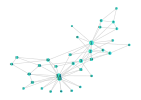

In [21]:
mysize = Float64[outdegree(g, v) for v in vertices(g)]
mysize .^= 0.3 # zoom factor
gplot(g, nodelabel=nodelabel, nodesize=mysize, nodelabelsize=mysize)

# Transparent

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


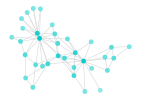

In [22]:
Pkg.add("Colors")
using Colors
# stick out large degree nodes
alphas = mysize/maximum(mysize)
nodefillc = [RGBA(0.0,0.8,0.8,i) for i in alphas]
gplot(g, nodefillc=nodefillc)

# Color the graph

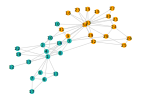

In [23]:
# nodes membership
membership = [1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2]
nodecolor = [colorant"lightseagreen", colorant"orange"]
# membership color
nodefillc = nodecolor[membership]
gplot(g, nodefillc=nodefillc, nodelabel=nodelabel)

# Different layouts

# Random Layout

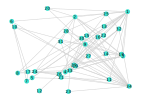

In [24]:
gplot(g, layout=random_layout, nodelabel=nodelabel)

# Circular Layout

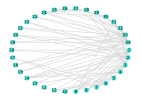

In [25]:
# circular layout
gplot(g, layout=circular_layout, nodelabel=nodelabel)

# Spectral Layout

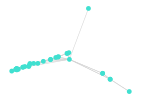

In [26]:
# spectral layout
gplot(g, layout=spectral_layout)

# Shell Layout

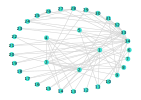

In [27]:
# shell layout
nlist = Vector{Vector{Int}}() # two shells
push!(nlist, collect(1:5)) # first shell
push!(nlist, collect(6:nv(g))) # second shell
locs_x, locs_y = shell_layout(g, nlist)
gplot(g, locs_x, locs_y, nodelabel=nodelabel)

# Curve Edge

In [28]:
gplot(g, nodelabel=nodelabel, linetype="curve", outangle=π/11)

MethodError: MethodError: no method matching Array{Array{T,1} where T,N} where N(::Int64)
Closest candidates are:
  Array{Array{T,1} where T,N} where N(!Matched::UndefInitializer, !Matched::Int64) where T at boot.jl:419
  Array{Array{T,1} where T,N} where N(!Matched::UndefInitializer, !Matched::Int64, !Matched::Int64) where T at boot.jl:420
  Array{Array{T,1} where T,N} where N(!Matched::UndefInitializer, !Matched::Int64, !Matched::Int64, !Matched::Int64) where T at boot.jl:421
  ...

# Native LightGraphs integration

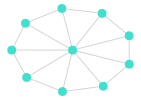

In [29]:
h = wheel_graph(10)
gplot(h)

# Save figure to file

In [30]:
using Cairo, Compose
# save to pdf
draw(PDF("karate.pdf", 16cm, 16cm), gplot(g))
# save to png
draw(PNG("karate.png", 16cm, 16cm), gplot(g))
# save to svg
draw(SVG("karate.svg", 16cm, 16cm), gplot(g))

ArgumentError: ArgumentError: Package Cairo not found in current path:
- Run `import Pkg; Pkg.add("Cairo")` to install the Cairo package.


# Other graph visualization packages
* [GraphLayout.jl](https://github.com/IainNZ/GraphLayout.jl) - Graph layout and visualization algorithms, implemented in Julia.
* [GraphViz.jl](https://github.com/Keno/GraphViz.jl) - Julia binding to the `GraphViz` library.
* [TikzGraphs.jl](https://github.com/sisl/TikzGraphs.jl) - plot `Graph.jl` graphs using `lualatex/tikz`.

# Thanks
* [Iain Dunning](https://github.com/IainNZ) for `spring` and `stressmajorize` layout algorithms ([GraphLayout.jl](https://github.com/IainNZ/GraphLayout.jl))
* [Daniel C. Jones](https://github.com/dcjones) for [Compose.jl](https://github.com/dcjones/Compose.jl)

In [ ]:
G = SimpleWeightedDiGraph(A)